In [66]:
import matplotlib.pyplot as plt
import os
import sys
sys.path.append("/workspaces/pluto_testproblem/PLUTO/Tools/pyPLUTO/")
from pluto_plotting import *
from mpl_toolkits.axes_grid1 import make_axes_locatable
os.environ["PLUTO_DIR"] = "/workspaces/pluto_testproblem/PLUTO/"

In [67]:
import pyPLUTO as pypl
import pyPLUTO.pload as pp

In [69]:
system_name = 'jet_tester'
data_dir = '/Test_Problems/HD/Jet/data_storage/'
#data_dir = '/data_from_oven/'

In [70]:
i = 1 # timestamp to plot 
D = load_data_obj(data_dir,i)

Reading multiple variable files : /Users/katiesavard/Desktop/pluto_testproblem/PLUTO/Test_Problems/HD/Jet/data_storage/rho.0000.dbl
Reading multiple variable files : /Users/katiesavard/Desktop/pluto_testproblem/PLUTO/Test_Problems/HD/Jet/data_storage/vx1.0000.dbl
Reading multiple variable files : /Users/katiesavard/Desktop/pluto_testproblem/PLUTO/Test_Problems/HD/Jet/data_storage/vx2.0000.dbl
Reading multiple variable files : /Users/katiesavard/Desktop/pluto_testproblem/PLUTO/Test_Problems/HD/Jet/data_storage/vx3.0000.dbl
Reading multiple variable files : /Users/katiesavard/Desktop/pluto_testproblem/PLUTO/Test_Problems/HD/Jet/data_storage/prs.0000.dbl


Plot the density!

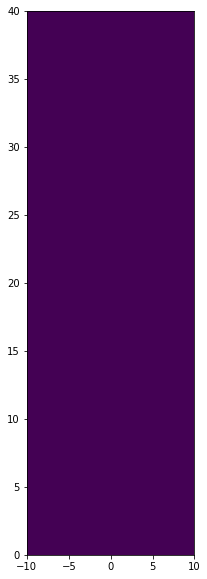

In [71]:
fig, ax = plt.subplots(figsize=[3,10])

# this can be vx1, vx2, vx3, rho, prs, or tr1 
var = D.rho[:,0,:]

p = ax.pcolormesh(D.x1,D.x3,var.T)
ax.pcolormesh(-D.x1,D.x3,var.T)

Plot the Mach number in the simulation

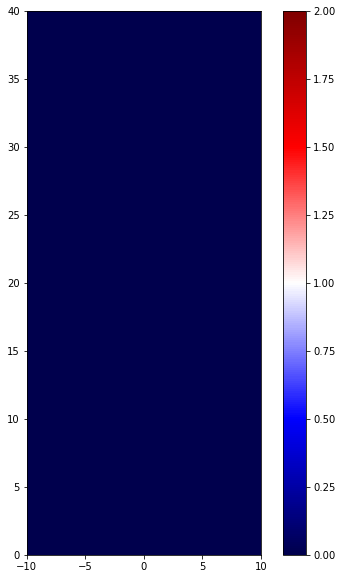

In [72]:
vx1 = D.vx1[:,0,:]
vx3 = D.vx3[:,0,:]

total_vel_sq = np.sqrt((vx1**2)+(vx3**2))
adiabatic_index = 4.0/3.0
prs = D.prs[:,0,:]
rho = D.rho[:,0,:]
sound_speed = np.sqrt(adiabatic_index*prs/rho)
mach_num = total_vel_sq/sound_speed


fig, ax = plt.subplots(figsize=[5,10])


p = ax.pcolormesh(D.x1,D.x3,mach_num.T,cmap='seismic',vmin=0,vmax=2)
ax.pcolormesh(-D.x1,D.x3,mach_num.T,cmap='seismic',vmin=0,vmax=2)
divider = make_axes_locatable(ax)
cax1 = divider.append_axes("right", size="10%", pad=0.3)
cax1.set_ylim((0,2))
c = plt.colorbar(p,cax=cax1)